## Analysis

### Declarations

In [12]:
# Importing utilities file with library imports and helper functions
%run "utils.ipynb"

In [3]:
# Loading input pickle files
df_combined=pd.read_pickle(input_path+"\\combined_dataset_nona.pkl")
df_combined_florida=pd.read_pickle(input_path+"\\combined_dataset_nona_florida.pkl")

### PCA for health outcome variables

In [4]:
health_outcomes_features = {
    "Any Disability": "Disability",
    "Cognitive Disability": "Disability",
    "Hearing Disability": "Disability",
    "Independent Living Disability": "Disability",
    "Mobility Disability": "Disability",
    "Self-care Disability": "Disability",
    "Vision Disability": "Disability",
    "All Teeth Lost": "Health Outcomes",
    "Arthritis": "Health Outcomes",
    "COPD": "Health Outcomes",
    "Cancer (except skin)": "Health Outcomes",
    "Chronic Kidney Disease": "Health Outcomes",
    "Coronary Heart Disease": "Health Outcomes",
    "Current Asthma": "Health Outcomes",
    "Depression": "Health Outcomes",
    "Diabetes": "Health Outcomes",
    "High Blood Pressure": "Health Outcomes",
    "High Cholesterol": "Health Outcomes",
    "Obesity": "Health Outcomes",
    "Stroke": "Health Outcomes",
    "Binge Drinking": "Health Risk Behaviors",
    "Current Smoking": "Health Risk Behaviors",
    "Physical Inactivity": "Health Risk Behaviors",
    "Sleep <7 hours": "Health Risk Behaviors",
    "General Health": "Health Status",
    "Mental Health": "Health Status",
    "Physical Health": "Health Status",
    "Annual Checkup": "Prevention",
    "Cervical Cancer Screening": "Prevention",
    "Cholesterol Screening": "Prevention",
    "Colorectal Cancer Screening": "Prevention",
    "Core preventive services for older men": "Prevention",
    "Core preventive services for older women": "Prevention",
    "Dental Visit": "Prevention",
    "Health Insurance": "Prevention",
    "Mammography": "Prevention",
    "Taking BP Medication": "Prevention",
}

In [5]:
# Creating lists of various categories of features in health outcome data 
var_preventive=[key for (key, value) in health_outcomes_features.items() if value=="Prevention"]
var_health_outcomes=[key for (key, value) in health_outcomes_features.items() if value=="Health Outcomes"]
var_disability=[key for (key, value) in health_outcomes_features.items() if value=="Disability"]
var_health_risk_beh=[key for (key, value) in health_outcomes_features.items() if value=="Health Risk Behaviors"]
var_health_status=[key for (key, value) in health_outcomes_features.items() if value=="Health Status"]

In [6]:
df_combined[var_preventive].head()

,Annual Checkup,Cervical Cancer Screening,Cholesterol Screening,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,Dental Visit,Health Insurance,Mammography,Taking BP Medication
132,74.5,85.6,89.1,76.9,55.9,45.5,74.7,4.1,82.1,78.9
133,69.2,73.5,78.0,77.4,52.9,38.8,68.6,4.7,79.6,70.1
135,75.7,86.2,88.3,81.7,56.5,47.0,74.7,3.8,82.2,74.5
136,71.7,85.4,89.0,79.0,57.4,44.8,75.9,3.3,79.1,73.3
137,73.1,85.9,89.2,76.4,55.2,49.6,75.2,3.7,82.9,76.8


In [7]:
set(health_outcomes_features.values())

{'Disability',
 'Health Outcomes',
 'Health Risk Behaviors',
 'Health Status',
 'Prevention'}

In [8]:
# Applying PCA function on the features
 
pca = PCA(n_components = 2)
explained_variance={}
loadings={}
pca_components={}

for outcome in set(health_outcomes_features.values()):
    var=[k for (k, v) in health_outcomes_features.items() if v==outcome]
    pca_preventive = pca.fit_transform(df_combined[var])
    explained_variance[outcome] = pca.explained_variance_ratio_

pca_health_outcomes = pca.fit_transform(df_combined[list(health_outcomes_features.keys())])
explained_variance['All health_outcomes'] = pca.explained_variance_ratio_
pca_components['All health outcomes']=pca.components_
transformed_health_outcomes=pd.DataFrame(pca_health_outcomes, columns=['HO_PC1', 'HO_PC2'], index=df_combined.index)

print(f"% variance explained by the first 2 components:")
display(explained_variance)

# Get the coefficients (loadings) of the original features in the principal components and display at a dataframe
loadings["All health outcomes"] = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=list(health_outcomes_features.keys()))
print("Loadings (Coefficients of original features in principal components):")
display(loadings["All health outcomes"])

# Sample of transformed dataset
print("Transformed data")
display(transformed_health_outcomes.head(5))

% variance explained by the first 2 components:


{'Disability': array([0.91961321, 0.05046958]),
 'Health Risk Behaviors': array([0.79943146, 0.08215531]),
 'Health Status': array([0.92453798, 0.0602966 ]),
 'Prevention': array([0.55402651, 0.16747991]),
 'Health Outcomes': array([0.67569902, 0.15760106]),
 'All health_outcomes': array([0.57035507, 0.18015129])}

Loadings (Coefficients of original features in principal components):


,PC1,PC2
Any Disability,0.318247,-0.069496
Cognitive Disability,0.165529,0.063490
Hearing Disability,0.056385,-0.063174
Independent Living Disability,0.121664,0.005533
Mobility Disability,0.202770,-0.114614
Self-care Disability,0.069446,-0.000644
Vision Disability,0.094270,0.029161
All Teeth Lost,0.261051,0.008541
Arthritis,0.125384,-0.356682
COPD,0.095902,-0.082711


Transformed data


,HO_PC1,HO_PC2
132,-15.577612,-15.976026
133,-23.011332,12.225224
135,-25.414672,-9.775446
136,-33.176673,-3.938136
137,-18.984948,-13.894317


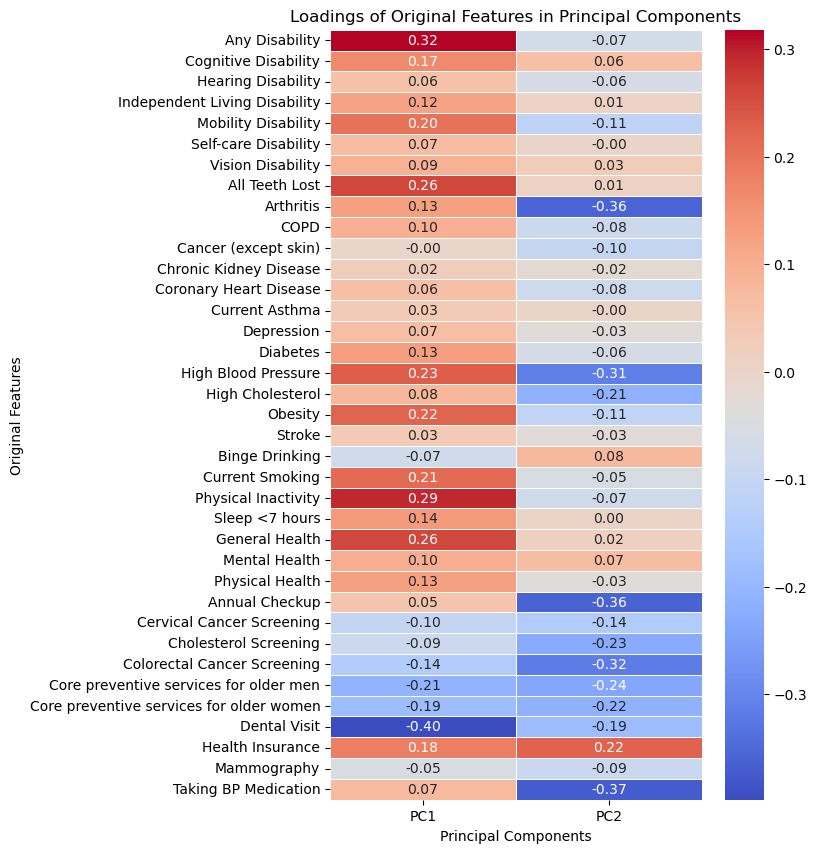

In [9]:
plt.figure(figsize=(6, 10))
sns.heatmap(loadings["All health outcomes"], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Loadings of Original Features in Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

Insights:
<ol>
<li>92% of variance can be explained by the first component for both disablity and health status. 80% of variance can be explained by the first component for health risk behaviors. All of these outcomes types can be used as a single feature.</li>
<li>57+18=75% variance across all health outcomes can be explained by the first two components.</li>
<li></li>
</ol>

In [10]:
import numpy as np
from sklearn.decomposition import PCA

# Sample data (replace this with your data)
data = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [7, 8, 9]]))

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform the data
pca.fit(data)
transformed_data = pca.transform(data)

# Extract first two principal components
first_two_components = pca.components_[:2]

print(data)
print("First two principal components:")
print(first_two_components)


   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
3  7  8  9
First two principal components:
[[-0.57735027 -0.57735027 -0.57735027]
 [-0.81649658  0.40824829  0.40824829]]


In [11]:
'Prevention': array([0.96440362, 0.02018365]),
 'Health Status': array([0.76729052, 0.23270948]),
 'Health Risk Behaviors': array([0.85137434, 0.12919839]),
 'Health Outcomes': array([0.96506689, 0.01517758]),
 'Disability': array([0.98565503, 0.00892913]),
 'All health_outcomes': array([0.97964048, 0.01130454])}

SyntaxError: unmatched '}' (3007347663.py, line 6)

In [ ]:
pca_components['All health outcomes'].shape

(2, 25315)

In [ ]:
pca_components['All health outcomes'][0].shape

(25315,)

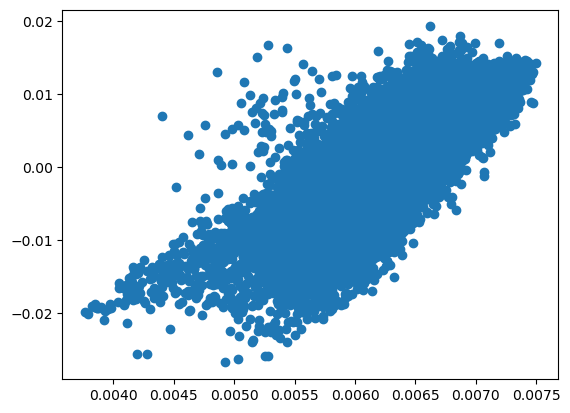

In [ ]:
plt.scatter(x=pca_components['All health outcomes'][0], y=pca_components['All health outcomes'][1]);

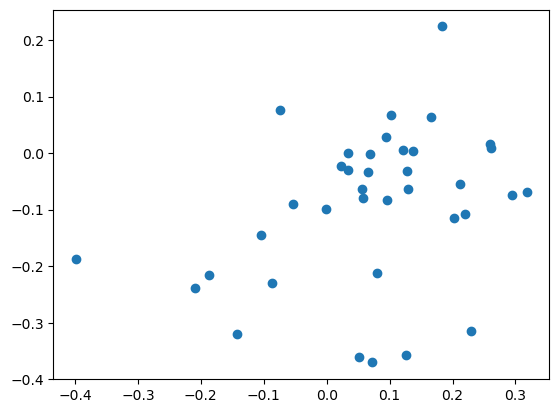

In [13]:
plt.scatter(x=pca_components['All health outcomes'][0], y=pca_components['All health outcomes'][1]);